In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import mnist#mlist.py 불러오기

In [2]:
"""데이터 load"""
((X_train, y_train), (X_test,y_test)) = mnist.load_mnist()

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [4]:
print(X_train[0,:].max()) #이미지 최대 값
print(X_train[0,:].min()) #이미지 최소 값

1.0
0.0


### 이미지 살펴보기

(array([639.,  11.,   6.,  11.,   6.,   9.,  11.,  12.,  11.,  68.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

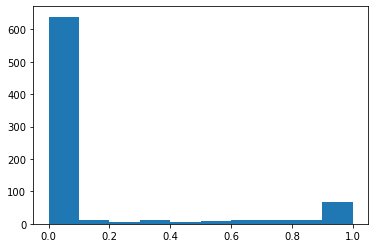

In [5]:
plt.hist(X_train[0,:]) # 손 글씨로 그린 부분이 0이상의 데이터로 구성되어있다.

5


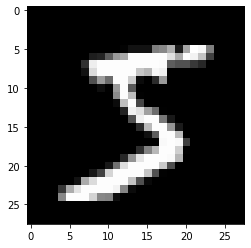

In [27]:
index = 0
print(y_train[index])
plt.imshow(X_train[index,:].reshape(28,28),cmap='gray')

### 문제, 답 나누기 (분석 속도를 위해 일부 데이터만 사용)

In [ ]:
X_train = X_train[:5000]
y_train = y_train[:5000]

In [30]:
np.bincount(y_train)

array([479, 563, 488, 493, 535, 434, 501, 550, 462, 495])

# 모델 돌리기

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings('ignore')

In [32]:
model_logi = LogisticRegression()
model_logi.fit(X_train,y_train)
print("로지스틱 훈련 점수 : ",model_logi.score(X_train,y_train))
print("로지스틱 테스트 점수 : ",model_logi.score(X_test,y_test))

로지스틱 훈련 점수 :  0.988
로지스틱 테스트 점수 :  0.8947


In [33]:
model_logi.predict(X_test)[0]

7

In [36]:
model_logi.predict_proba(X_test)[0]

array([6.82899672e-08, 1.20791949e-11, 4.74258513e-06, 6.56631345e-04,
       1.70357272e-08, 1.03066237e-07, 9.89928995e-13, 9.99315021e-01,
       5.61375706e-07, 2.28554567e-05])

In [37]:
model_scv = LinearSVC()
model_scv.fit(X_train,y_train)
print("선형 SVM 훈련 점수 : ",model_scv.score(X_train,y_train))
print("선형 SVM 테스트 점수 : ",model_scv.score(X_test,y_test))

선형 SVM 훈련 점수 :  0.9936
선형 SVM 테스트 점수 :  0.8693


In [38]:
model_scv.predict(X_test)[0]

7

# 하이퍼 파라메터 C를 이용한 교차검증

In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
C_list = [0.01,0.1,1,10,100]

for c in C_list:
    model = LogisticRegression(C=c, max_iter=1000000)
    print(c,":",cross_val_score(model,X_train,y_train,cv=5).mean())

0.01 : 0.8862
0.1 : 0.9016
1 : 0.8966000000000001
10 : 0.8870000000000001
100 : 0.882


In [41]:
C_list = [0.01,0.1,1,10,100]

for c in C_list:
    model2 = LinearSVC(C=c, max_iter=1000000)
    print(c,":",cross_val_score(model2,X_train,y_train,cv=5).mean())

0.01 : 0.8976
0.1 : 0.8905999999999998
1 : 0.8692
10 : 0.8506
100 : 0.8436
